# #PharmaTwitter


Having found the Harvard Business Review's ranking of the most skilled companies on twitter ["50 Companies That Get Twitter – and 50 That Don’t"](https://hbr.org/2015/04/the-best-and-worst-corporate-tweeters), I decided to carry out a small analysis myself. 

The HBR's analysis was conducted on 350,00 tweets of 300 companies listed on NASDAQ, NYSE or FTSE and presents an "empathy" scoring, where the most empathetic companies are on top. Even though the author explains that the methodology assumes empathy consists of: "reassurance, authenticity, and emotional connection" it's a difficult task to actually measure it in real life. On the other hand, it is possible to measure engagement.


In the ranking AstraZeneca took the last place - why is that? Do we differ that much from other pharmaceutical companies? Let's check!

Code can be found on my GitHub account: [mbalcerzak](https://github.com/mbalcerzak/twitter_pharma)

## Do pharmaceutical companies need Twitter?
##### It's important to engage with patients on twitter 

The new generation get their news from social media. Twitter is a way to communicate and educate patients, solve problems and inform. That's why it's so important to engage with the followers in an authentic and empathetic way. 

According to the article ["It’s Time to Tweet—How Pharma Should Be Using Twitter"](https://www.pm360online.com/its-time-to-tweet-how-pharma-should-be-using-twitter/) there are numerous benefits to engaging with patients and investors on social media:
 - top 10 biggest pharmaceutical companies already use Twitter
 - accessible and timely information for patients and regulators
 - interacting with opinion leaders and "pharmaceutical influencers"
 - increased comapnu reputation
 - better customer service
 - advertising opportunity (also for future hiring)


##### Good text source for NLP analysis

Personally, I wanted to learn web scraping and Natural Language Processing and Twitter provides excellent starting tools and is a great data mining playground. Twitter encourages people to have open discussions and is frequently used by both companies and consumers. Most businesses use twitter, pharmaceutical companies are no exception. 

## Web Scraping

Tweets of the chosen companies were collected using [**tweepy**](https://www.tweepy.org/) package for Python 3.x. The accounts are officially verified. 
- [AstraZeneca](https://twitter.com/AstraZeneca) 
- [Johnson & Johnson](https://twitter.com/JNJCares)
- [Roche](https://twitter.com/Roche)
- [Pfizer](https://twitter.com/Pfizer) 
- [Novartis](https://twitter.com/Novartis)
- [BayerPharma](https://twitter.com/BayerPharma) 
- [Merck](https://twitter.com/Merck) 
- [GSK](https://twitter.com/GSK) 
- [Sanofi](https://twitter.com/Sanofi)
- [Abbvie](https://twitter.com/abbvie)
- [Abbott](https://twitter.com/AbbottGlobal) 
- [Eli Lilly and Company](https://twitter.com/LillyPad) 
- [Amgen](https://twitter.com/Amgen) 
- [Bristol-Myers Squibb](https://twitter.com/bmsnews) 
- [GileadSciences](https://twitter.com/GileadSciences) 

Code I used to scrape the data is fully available on GitHub: [mbalcerzak/../webscraping/](https://github.com/mbalcerzak/twitter_pharma/tree/master/web_scraping)

In [1]:
# packages used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections
import re
import os

from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from scipy import stats
from nltk.corpus import stopwords

In [2]:
path = 'C:/Users/malgo_000/Desktop/Web_scraping/twitter_scraping/tweet_texts_pharma/'
#path = os.path.join(os.getcwd(), 'tweet_texts_pharma/')

def prepare_dataset(company):
    df = pd.read_csv(path + '%s_tweets.txt' % company, sep='|')
    
    df['company'] = company
    df['id'] = df['id'].apply(str)
    
    df['hashtags'] = df['text'].apply(lambda s: re.findall(r'#(\w+)', s))
    df['num_hash'] = df['hashtags'].apply(len)
    
    df['tagged'] = df['text'].apply(lambda s: re.findall(r'@(\w+)', s))
    
    def clean_tweet(tweet):
        check = '(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)'
        return ' '.join(re.sub(check, ' ', tweet).split())
        
    df['clean_tweet'] = [clean_tweet(tweet) for tweet in df['text']]    
    df['len'] = df['clean_tweet'].apply(len)
    df['text_as_list'] = df['clean_tweet'].str.split(' ')
    
    df['datetime'] = pd.to_datetime(df['created_at'])
    df['date'] = df['datetime'].apply(lambda x: x.strftime("%Y-%m-%d"))
    df['hour'] = df['datetime'].apply(lambda x: x.hour)
    df['month'] = df['datetime'].apply(lambda x: x.month)
    df['day'] = df['datetime'].apply(lambda x: x.day)
    df['year'] = df['datetime'].apply(lambda x: x.year)
    df = df.drop(columns=['created_at'])
    
    df['z'] = np.abs(stats.zscore(df['fav']))
    
    return df

df = prepare_dataset('AstraZeneca')

## Exploratory Data Analysis

Let's explain what the variables mean:

>**id** - unique identifier for a tweet  
**text** - UTF-8 text of the status update  
**retweet** - was it an original post or a retweet  
**source** - what device was used to post  
**fav** -  how many likes it received  
**RT** - how many times was that post retweeted  
**hashtags** - what hashtags were used   
**num_hash** - number of hashtags used  
**company** - name of the posting account  
**tagged** - which accounts were mentioned  
**clean_tweet** - text without special characters  
**len** -  length of the clean tweet  
**datetime** - date and time of posting a tweet, later split into: **date**, **hour**, **month**, **day**, **year**   
**z** - Z-score value

In [3]:
pd.set_option('display.max_colwidth', -1)
df.head(3)

,id,text,retweet,source,fav,RT,hashtags,company,num_hash,tagged,clean_tweet,len,text_as_list,datetime,date,hour,month,day,year,z
0,1140218482409144320,"While progress has been made, there is still unmet medical need for people with chronic lymphocytic #leukaemia (CLL). For many, the disease may return even after successful treatment. We’re committed to advancing the science to transform cancer care for these patients. #EHA24 https://t.co/csEGUUf7Ym",False,Percolate,8,4,"[leukaemia, EHA24]",AstraZeneca,2,[],While progress has been made there is still unmet medical need for people with chronic lymphocytic leukaemia CLL For many the disease may return even after successful treatment We re committed to advancing the science to transform cancer care for these patients EHA,265,"[While, progress, has, been, made, there, is, still, unmet, medical, need, for, people, with, chronic, lymphocytic, leukaemia, CLL, For, many, the, disease, may, return, even, after, successful, treatment, We, re, committed, to, advancing, the, science, to, transform, cancer, care, for, these, patients, EHA]",2019-06-16 11:24:05,2019-06-16,11,6,16,2019,0.029039
1,1140177930796093441,It's #pridemonth. Yesterday our colleagues and their familes walked in the #Gothenburg West Pride. We are proud of our Swedish heritage and Gothenburg is home to many of our people. Read more about our #LGBTQIA+ Employee Resource Groups https://t.co/MpcRomxoVX - #thisisAZ https://t.co/A8WAkkdWvu,False,Twitter for iPhone,11,2,"[pridemonth, Gothenburg, LGBTQIA, thisisAZ]",AstraZeneca,4,[],It s pridemonth Yesterday our colleagues and their familes walked in the Gothenburg West Pride We are proud of our Swedish heritage and Gothenburg is home to many of our people Read more about our LGBTQIA Employee Resource Groups thisisAZ,238,"[It, s, pridemonth, Yesterday, our, colleagues, and, their, familes, walked, in, the, Gothenburg, West, Pride, We, are, proud, of, our, Swedish, heritage, and, Gothenburg, is, home, to, many, of, our, people, Read, more, about, our, LGBTQIA, Employee, Resource, Groups, thisisAZ]",2019-06-16 08:42:56,2019-06-16,8,6,16,2019,0.025737
2,1139919536193335297,"Today marks 100 days until the start of #ClimateWeekNYC by @climategroup. As a member of #RE100, we believe 2019 is a critical year for accelerating global climate action. https://t.co/ll4NaORABY https://t.co/y2xpcbg3eS",False,Percolate,5,2,"[ClimateWeekNYC, RE100]",AstraZeneca,2,[climategroup],Today marks days until the start of ClimateWeekNYC by As a member of RE we believe is a critical year for accelerating global climate action,140,"[Today, marks, days, until, the, start, of, ClimateWeekNYC, by, As, a, member, of, RE, we, believe, is, a, critical, year, for, accelerating, global, climate, action]",2019-06-15 15:36:10,2019-06-15,15,6,15,2019,0.032341


Outliers can distort the analysis results, that's why I am going to remove them from the dataset

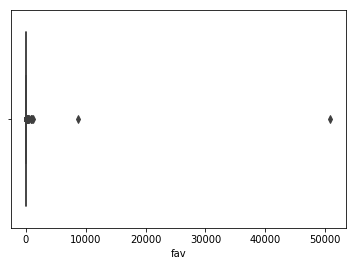

In [4]:
sns.boxplot(x = df['fav'])

### Removing outliers

There are two tweets that can be classified as outliers. They both received significanly more likes and were retweeted more frequently than the rest of AstraZeneca's tweets and would artificially inflate the company's statistics. 

Both will be removed from the dataset using Z-score metric:

```python
df['z'] = np.abs(stats.zscore(df['fav']))
```

In [5]:
display(df[df['z'] >= 3])

,id,text,retweet,source,fav,RT,hashtags,company,num_hash,tagged,clean_tweet,len,text_as_list,datetime,date,hour,month,day,year,z
273,1105192019507462144,AstraZeneca confirms we no longer advertise on the Tucker Carlson show and we will not be advertising on this program in the future.,True,Twitter Web Client,8656,2111,[],AstraZeneca,0,[],AstraZeneca confirms we no longer advertise on the Tucker Carlson show and we will not be advertising on this program in the future,131,"[AstraZeneca, confirms, we, no, longer, advertise, on, the, Tucker, Carlson, show, and, we, will, not, be, advertising, on, this, program, in, the, future]",2019-03-11 19:41:25,2019-03-11,19,3,11,2019,9.490501
1398,973920289850576896,"""Look up at the stars and not down at your feet"" - Professor Stephen Hawking\r\n1942-2018 https://t.co/h8uWznhEpb https://t.co/RVeQx2BTxP",True,Twitter Web Client,50854,31990,[],AstraZeneca,0,[],Look up at the stars and not down at your feet Professor Stephen Hawking,72,"[Look, up, at, the, stars, and, not, down, at, your, feet, Professor, Stephen, Hawking]",2018-03-14 13:54:26,2018-03-14,13,3,14,2018,55.941188


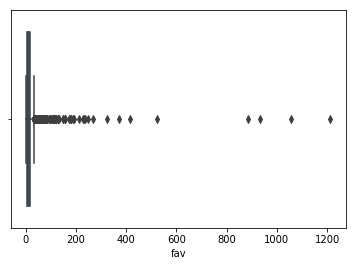

In [6]:
df = df[df['z'] < 3]
sns.boxplot(x = df['fav'])

### AZ's statistics

Dataset with AZ's posts has 3226 unique tweets from 10th June 2016 to 16th June 2019. 

In [7]:
print('Average length of an AstraZeneca tweet: {}'.format(round(np.mean(df['len']))))
print('Number of likes for the most liked tweet: {}'.format(np.max(df['fav'])))
print('An average tweet received {} likes'.format(round(np.mean(df['fav']))))
print('AZ tweets got on average {} likes and retweets {}'.format(round(np.mean(df['fav'][df['retweet']==False])),
                                                                 round(np.mean(df['fav'][df['retweet']==True]))))

Average length of an AstraZeneca tweet: 140
Number of likes for the most liked tweet: 1213
An average tweet received 16 likes
AZ tweets got on average 12 likes and retweets 31


In [8]:
print('A tweet that received the most likes:')
display(df[['clean_tweet','hashtags','fav','RT']][df['fav']==max(df['fav'])])

print('Most liked non-retweeted tweet:')
df_org = df[df['retweet']==False]
display(df_org[['clean_tweet','hashtags','fav','RT']][df_org['fav']==max(df_org['fav'])])

A tweet that received the most likes:


,clean_tweet,hashtags,fav,RT
956,Happy LGBTSTEMDay one and all Let s work together for more inclusivity and more support for LGBTQ people in STEM,[LGBTSTEMDay],1213,790


Most liked non-retweeted tweet:


,clean_tweet,hashtags,fav,RT
845,We are named a global sustainability leader by the Dow Jones Sustainability Index We received industry top scores in the areas Environmental Reporting Labour Practice Indicators and Health Outcome Contribution sustainability DJSI ESG,"[sustainability, DJSI, ESG]",325,16


### Creating a combined dataset of all companies

In [28]:
def combine_tweets(company_names):
    df_all = pd.DataFrame()
    for company in company_names:
        df_all = df_all.append(prepare_dataset(company))        
    
    df_all = df_all[df_all['z'] < 3] 
    df_all = df_all.append(df)
    
    return df_all

company_list = ['JNJCares', 'Roche', 'Pfizer','Novartis', 'BayerPharma',
                'Merck','GSK','Sanofi', 'abbvie', 'AbbottGlobal',
                'LillyPad', 'Amgen', 'bmsnews', 'GileadSciences']

df_all = combine_tweets(company_list)
df_all.sample(3)

,id,text,retweet,source,fav,RT,hashtags,company,num_hash,tagged,clean_tweet,len,text_as_list,datetime,date,hour,month,day,year,z
986,981954623299817472,Patient groups ranked us #4 in @PatientView’s 2017 Reputation Report. Read our recently published Commitment to Patients and Caregivers to see how we are working to do\r\neven better. #OurCommitment,False,Twitter Ads Composer,10,1,"[4, OurCommitment]",Novartis,2,[PatientView],Patient groups ranked us in s Reputation Report Read our recently published Commitment to Patients and Caregivers to see how we are working to do even better OurCommitment,171,"[Patient, groups, ranked, us, in, s, Reputation, Report, Read, our, recently, published, Commitment, to, Patients, and, Caregivers, to, see, how, we, are, working, to, do, even, better, OurCommitment]",2018-04-05 18:00:00,2018-04-05,18,4,5,2018,0.174646
1198,928571883817193472,O. Charmeil tells #APEC2017 that delivery of innovation requires joint effort from public &amp; private #leaders to develop the right #skills to deliver #medicines to #patients #education #science #sanofi #APECCEOSummit #madeintheworld https://t.co/Zdzx5maMEB,False,Twitter Web Client,7,2,"[APEC2017, leaders, skills, medicines, patients, education, science, sanofi, APECCEOSummit, madeintheworld]",Sanofi,10,[],O Charmeil tells APEC that delivery of innovation requires joint effort from public amp private leaders to develop the right skills to deliver medicines to patients education science sanofi APECCEOSummit madeintheworld,218,"[O, Charmeil, tells, APEC, that, delivery, of, innovation, requires, joint, effort, from, public, amp, private, leaders, to, develop, the, right, skills, to, deliver, medicines, to, patients, education, science, sanofi, APECCEOSummit, madeintheworld]",2017-11-09 10:36:03,2017-11-09,10,11,9,2017,0.075395
222,1116468467836829697,Healthcare systems are at a critical inflection point. Learn how #Amgen’s commitment to #innovation is helping to accelerate the positive trends in healthcare and change the course of negative ones in CEO Bob Bradway’s 2018 letter to shareholders. $AMGN,False,Twitter Ads Composer,1,0,"[Amgen, innovation]",Amgen,2,[],Healthcare systems are at a critical inflection point Learn how Amgen s commitment to innovation is helping to accelerate the positive trends in healthcare and change the course of negative ones in CEO Bob Bradway s letter to shareholders AMGN,243,"[Healthcare, systems, are, at, a, critical, inflection, point, Learn, how, Amgen, s, commitment, to, innovation, is, helping, to, accelerate, the, positive, trends, in, healthcare, and, change, the, course, of, negative, ones, in, CEO, Bob, Bradway, s, letter, to, shareholders, AMGN]",2019-04-11 22:30:00,2019-04-11,22,4,11,2019,0.138239


### All companies' statistics

In [43]:
statistics = [max, np.median]
grouped = df_all[df_all['retweet']==False].groupby('company').agg({"fav" : statistics,
                                                                   "RT" : statistics,
                                                                   "len": statistics,
                                                                   "num_hash": statistics}) 
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

grouped.sort_values(by = 'fav_median', ascending = False)

,fav_max,fav_median,RT_max,RT_median,len_max,len_median,num_hash_max,num_hash_median
company,,,,,,,,
Merck,2590,15,2309,7,276,93,7,1
Pfizer,1600,12,798,5,274,111,5,1
GSK,277,11,136,5,277,126,7,1
Novartis,237,11,163,5,272,97,7,1
Roche,66,10,44,4,271,109,6,2
AstraZeneca,325,9,154,4,277,128,25,2
abbvie,115,8,49,3,276,99,6,1
bmsnews,1711,8,630,4,261,95,7,2
BayerPharma,270,6,154,4,268,101,8,2


In [52]:
statistics = [max, np.median]
grouped = df_all[df_all['retweet']==False].agg({"fav" : statistics,
                                                "RT" : statistics,
                                                "len": statistics,
                                                "num_hash": statistics}) 
grouped.columns = ["".join(x) for x in grouped.columns.ravel()]
grouped

,fav,RT,len,num_hash
max,2590.0,2309.0,285.0,25.0
median,7.0,3.0,106.0,1.0


The most liked tweet received 2590 likes whereas overall median equals 7. One of the tweets was retweeted 2309 times while all companies' median is 3. Both record tweets were o Usually companies don't use all the available characters. The record number of hashtags is 25 and is held by AstraZeneca

In [53]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

In [59]:
record_likes = ("""
<blockquote class="twitter-tweet" data-lang="pl"><p lang="en" dir="ltr">Embracing his responsibility. Following his conscience. Strengthening his country. For these attributes and more, <a href="https://twitter.com/TIME?ref_src=twsrc%5Etfw">@TIME</a> names our CEO Ken Frazier to their 2018 <a href="https://twitter.com/hashtag/TIME100?src=hash&amp;ref_src=twsrc%5Etfw">#TIME100</a> list: <a href="https://t.co/zBFMisSM0Y">https://t.co/zBFMisSM0Y</a> <a href="https://t.co/gyNlKzbSBH">pic.twitter.com/gyNlKzbSBH</a></p>&mdash; Merck (@Merck) <a href="https://twitter.com/Merck/status/986995122385686528?ref_src=twsrc%5Etfw">19 kwietnia 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(record_likes)

In [60]:
record_retweets = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr"><a href="https://twitter.com/hashtag/Melanomas?src=hash&amp;ref_src=twsrc%5Etfw">#Melanomas</a> can occur anywhere on the skin, including areas without sun exposure. RT to raise awareness. <a href="https://twitter.com/hashtag/AACR18?src=hash&amp;ref_src=twsrc%5Etfw">#AACR18</a> <a href="https://t.co/xsLWCunZBh">pic.twitter.com/xsLWCunZBh</a></p>&mdash; Merck (@Merck) <a href="https://twitter.com/Merck/status/985518141211054080?ref_src=twsrc%5Etfw">April 15, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(record_retweets)

In [61]:
record_hash_num = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">We&#39;re so excited to have <a href="https://twitter.com/hashtag/280characters?src=hash&amp;ref_src=twsrc%5Etfw">#280characters</a> to talk about more <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a> <a href="https://twitter.com/hashtag/science?src=hash&amp;ref_src=twsrc%5Etfw">#science</a></p>&mdash; AstraZeneca (@AstraZeneca) <a href="https://twitter.com/AstraZeneca/status/928067467649409027?ref_src=twsrc%5Etfw">November 8, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(record_hash_num)

### Text normalisation

In order to faciliate further analysis it's essential to conduct text data pre-processing. I am going to:
- convert text into lower-case words
- remove stopwords
- conduct lemmatization [(Wikipedia explanation)](https://en.wikipedia.org/wiki/Lemmatisation)

Hashtags and links have already been removed in the previous step:
```python
    def clean_tweet(tweet):
        check = '(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)'
        return ' '.join(re.sub(check, ' ', tweet).split())
```

In [11]:
# I'm setting up the list of words used frequently in order to remove them later from tweets
# they do not provide any information for text analysis
stop_words = set(stopwords.words('english'))

print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'has', 'hasn', 'have', 'haven', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', 'more', 'most', 'mustn', 'my', 'myself', 'needn', 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'she', 'should', 'shouldn', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'v

In [12]:
def get_all_words(dataset, column_name, lem = True):
    lemmatizer = WordNetLemmatizer() 

    all_words = []
    all_words_lem = []

    for tweet in dataset[column_name]:
        for word in tweet:
            if word.lower() not in stop_words:
                all_words.append(word.lower())
                all_words_lem.append(lemmatizer.lemmatize(word.lower()))
    if lem == True:
        return all_words_lem
    else:
        return all_words
        
all_words_lem = get_all_words(df, 'text_as_list')
all_words = get_all_words(df, 'text_as_list', lem = False)

In [13]:
# Differences between original word and a lemmatised one

diff = pd.DataFrame({'original':all_words,'lemmatised': all_words_lem}, columns = ['original', 'lemmatised'])
diff[diff['original']!= diff['lemmatised']].sample(5)

,original,lemmatised
21967,helps,help
43351,options,option
25034,infections,infection
18573,sciences,science
6585,us,u


### Most common words

#### Most frequently occuring words in tweets:

In [14]:
company_list_full =  sorted(['AstraZeneca'] + company_list)

def popular_words_gen(column_name, n):
    popular_words_pd = pd.DataFrame()

    for company in company_list_full:

        company_words = get_all_words(df_all[df_all['company'] == company], column_name)
        counter = collections.Counter(company_words)
        popular_words_pd[company] = [x[0] for x in counter.most_common(n)] 

    return popular_words_pd

popular_words_gen('text_as_list', 15)

,AbbottGlobal,Amgen,AstraZeneca,BayerPharma,GSK,GileadSciences,JNJCares,LillyPad,Merck,Novartis,Pfizer,Roche,Sanofi,abbvie,bmsnews
0,hi,amgen,patient,patient,u,hiv,jnj,lilly,mrk,contact,amp,cancer,sanofi,amp,cancer
1,u,learn,science,bayer,contact,gilead,u,wearelilly,cancer,novartis,learn,roche,amp,learn,learn
2,thanks,amgenonco,cancer,cancer,help,learn,please,u,learn,please,patient,treatment,vivatech,u,patient
3,please,patient,amp,amp,amp,amp,learn,help,amp,saw,help,learn,health,see,amp
4,team,migraine,disease,stroke,gsk,u,thanks,patient,help,amp,cancer,patient,diabetes,patient,research
5,note,amp,new,u,find,people,team,medicine,latest,tweet,disease,new,patient,cancer,u
6,send,u,research,learn,please,treatment,amp,thanks,u,patient,health,people,people,help,c
7,assist,cancer,treatment,treatment,team,today,hear,learn,thank,new,u,u,live,new,new
8,help,new,help,help,thanks,hcv,like,new,news,follow,pfizer,disease,global,research,help
9,lifetothefullest,today,learn,dyk,vaccine,community,help,life,patient,u,w,rog,u,read,dyk


#### Most frequently occuring hashtags:

In [15]:
popular_words_gen('hashtags', 5)

,AbbottGlobal,Amgen,AstraZeneca,BayerPharma,GSK,GileadSciences,JNJCares,LillyPad,Merck,Novartis,Pfizer,Roche,Sanofi,abbvie,bmsnews
0,lifetothefullest,amgenonco,cancer,healthyaging,behindthescience,hiv,jnj,wearelilly,inventingforlife,novartisnews,dyk,lungcancer,sanofi,abbviegivesback,cancer
1,abbottwmm,amgen,azexchange,dyk,throughthelabs,hcv,discoverjnj,bio2016,lungcancer,novartisaccess,gethealthystayhealthy,immunotherapy,vivatech,hepc,dyk
2,proudsponsor,migraine,lungcancer,cancer,vaccinateforlife,gileadcompass,globalmoms,innovation,worldcancerday,novartis,biosimilars,breastcancer,diabetes,cancer,medium
3,fullosophy,amgenscholars,lupus,stroke,liveeverybreath,hepb,makehivhistory,cancer,cancer,migraine,cancer,hemophilia,techforhealth,asco16,lungcancer
4,italladdsup,biotechexperience,diabetes,realworldevidence,hiv,worldaidsday,healthforhumanity,asco16,dyk,accessinaction,afib,cancer,startup,psoriasis,immunooncology


#### Most frequently tagged accounts:

In [16]:
popular_words_gen('tagged', 10)

,AbbottGlobal,Amgen,AstraZeneca,BayerPharma,GSK,GileadSciences,JNJCares,LillyPad,Merck,Novartis,Pfizer,Roche,Sanofi,abbvie,bmsnews
0,abbottglobal,amgen,astrazeneca,bayerpharma,gsk,gileadsciences,scjohnson,lillypad,merck,novartis,pfizer,roche,sanofi,abbvie,bmsnews
1,clever_network,amgenfoundation,medimmune,bayer,savechildrenuk,aidsvu,savethechildren,lillydiabetes,adamhschechter,novartisfdn,thedoctors,shiftms,vivatech,directrelief,labcentral
2,wmmajors,us_fda,menepangalos,grants4apps,thekingsfund,greggalton,jnjcares,us_fda,merckformothers,vasnarasimhan,drphil,foundationatcg,sanofipasteur,startswithskin,theeiu
3,feedingamerica,labcentral,cambridge_uni,sas_freeman,viivhc,hepvu,janssenglobal,unitedway,amdiabetesassn,novartisscience,theeiu,gehealthcare,sanofifr,fortunemagazine,su2c
4,freestylediabet,amgenbiosim,planuk,uicc,comicrelief,fcaa,glblctzn,elanco,merckah,alcon,un,uicc,womens_forum,abbvieus,thevfoundation
5,londonmarathon,american_heart,pitchatpalace,iapb1,gsk_conferences,untilorg,donateaphoto,uwci,asco,jaybradner,sxsw,us_fda,sanofigenzyme,imc_worldwide,tomlynchcso
6,nycmarathon,novartis,onenucleus,broadinstitute,medsformalaria,wtrmrk,acuvue,squawkcnbc,jimkelly1212,annaertsnf,getold,ebdgroup,regeneron,us_fda,stupidcancer
7,berlinmarathon,khanacademy,oneyoungworld,myesmo,gskus,southernaidsco,babycenter,bloombergtv,cnbc,gsk,us_fda,panagorapharma,institutpasteur,heartofamericaf,atlanticlive
8,bostonmarathon,breakawaycancer,asco,ncdaccess,worldlupusfed,lymphoma,jnjinnovation,ampathkenya,megtirrell,medsformalaria,itiatlanta,aacr,connectingnurse,knowyournodes,pennwomen
9,fortunemagazine,amgenoncology,imperialcollege,bayerus,ucsf,calathletics,girlup,pih,lovemondotrasho,us_fda,theirc,medtecheurope,un,phrma,natlstrokeassoc


#### Wordcloud of most common words of all companies

In [17]:
def wordcloud_gen(word_list):
    plt.figure(figsize = (30,30))
    wordcloud_ = WordCloud( background_color = 'white',
                            max_words = 600,
                            max_font_size = 200,
                            width=1200, height=800,
                            random_state = 42,
                            collocations=False
                            ).generate(' '.join([a for a in word_list]))
    plt.imshow(wordcloud_)
    plt.axis('off')
    plt.show()

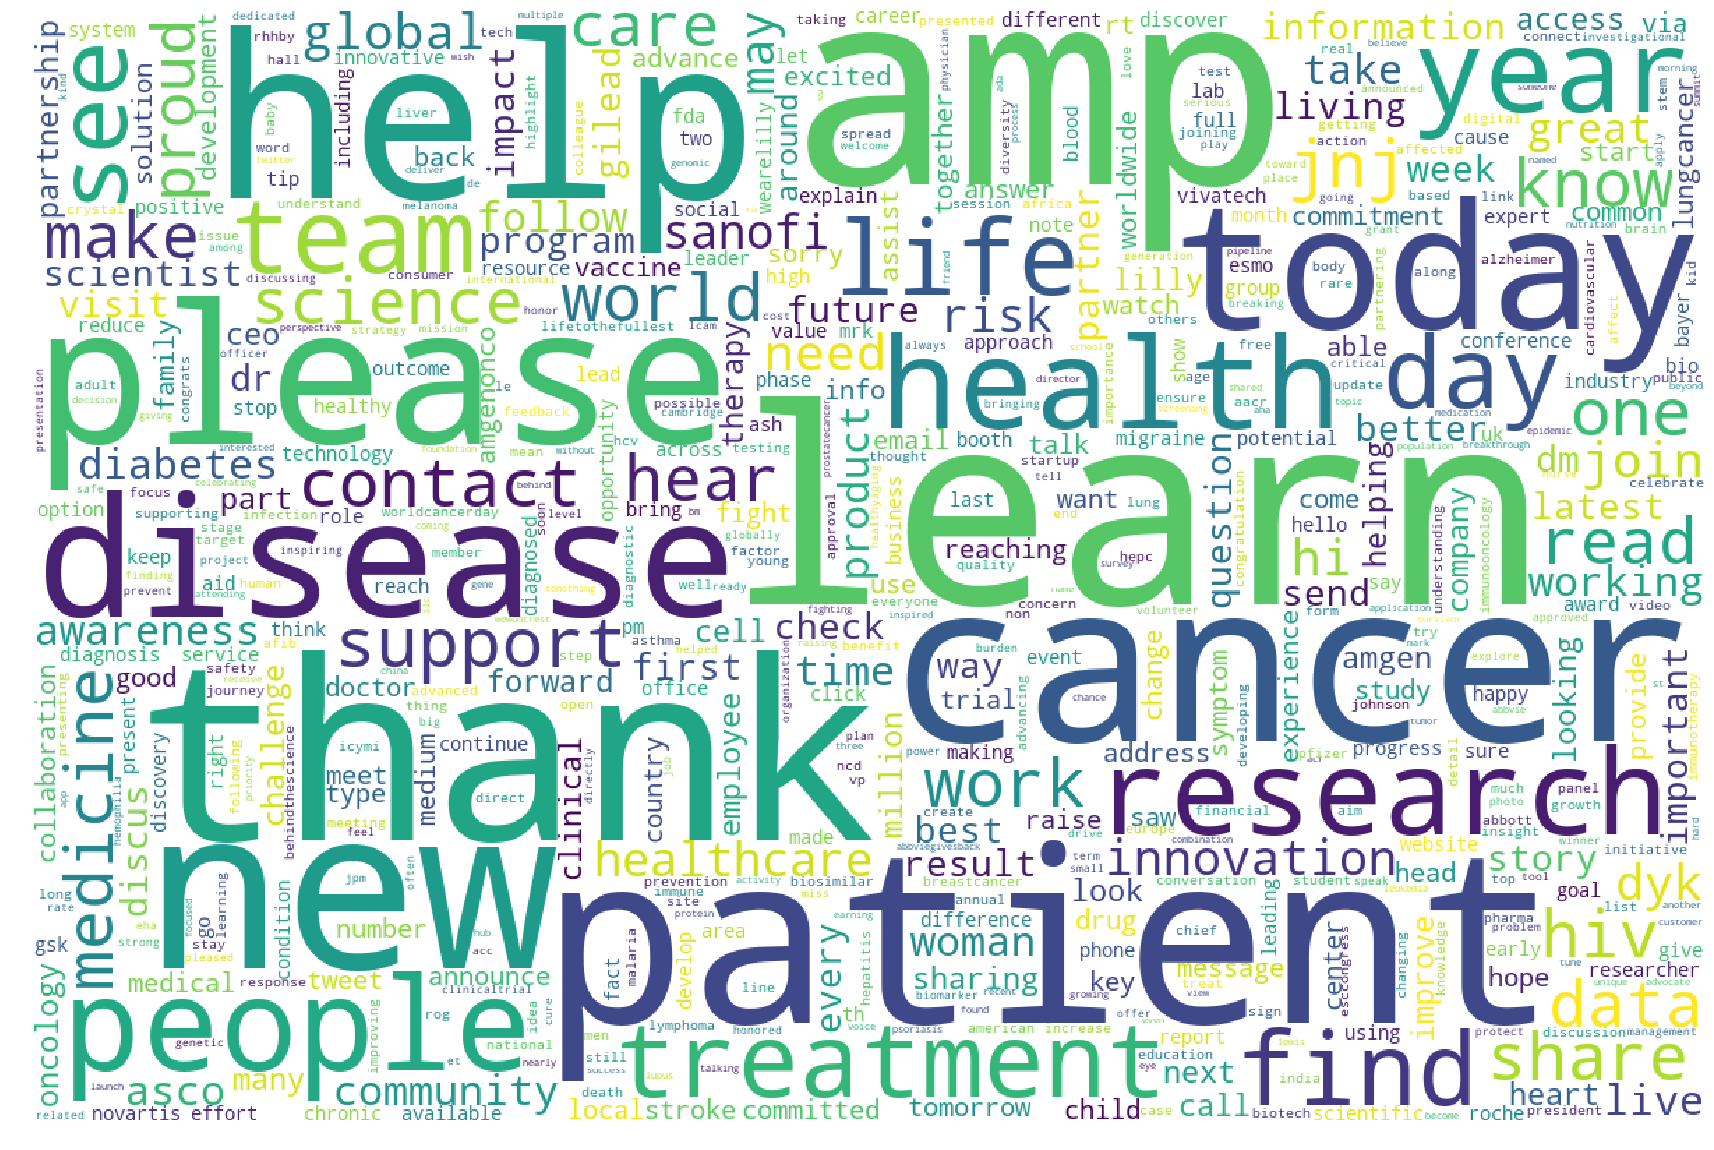

In [18]:
wordcloud_gen(get_all_words(df_all, 'text_as_list'))

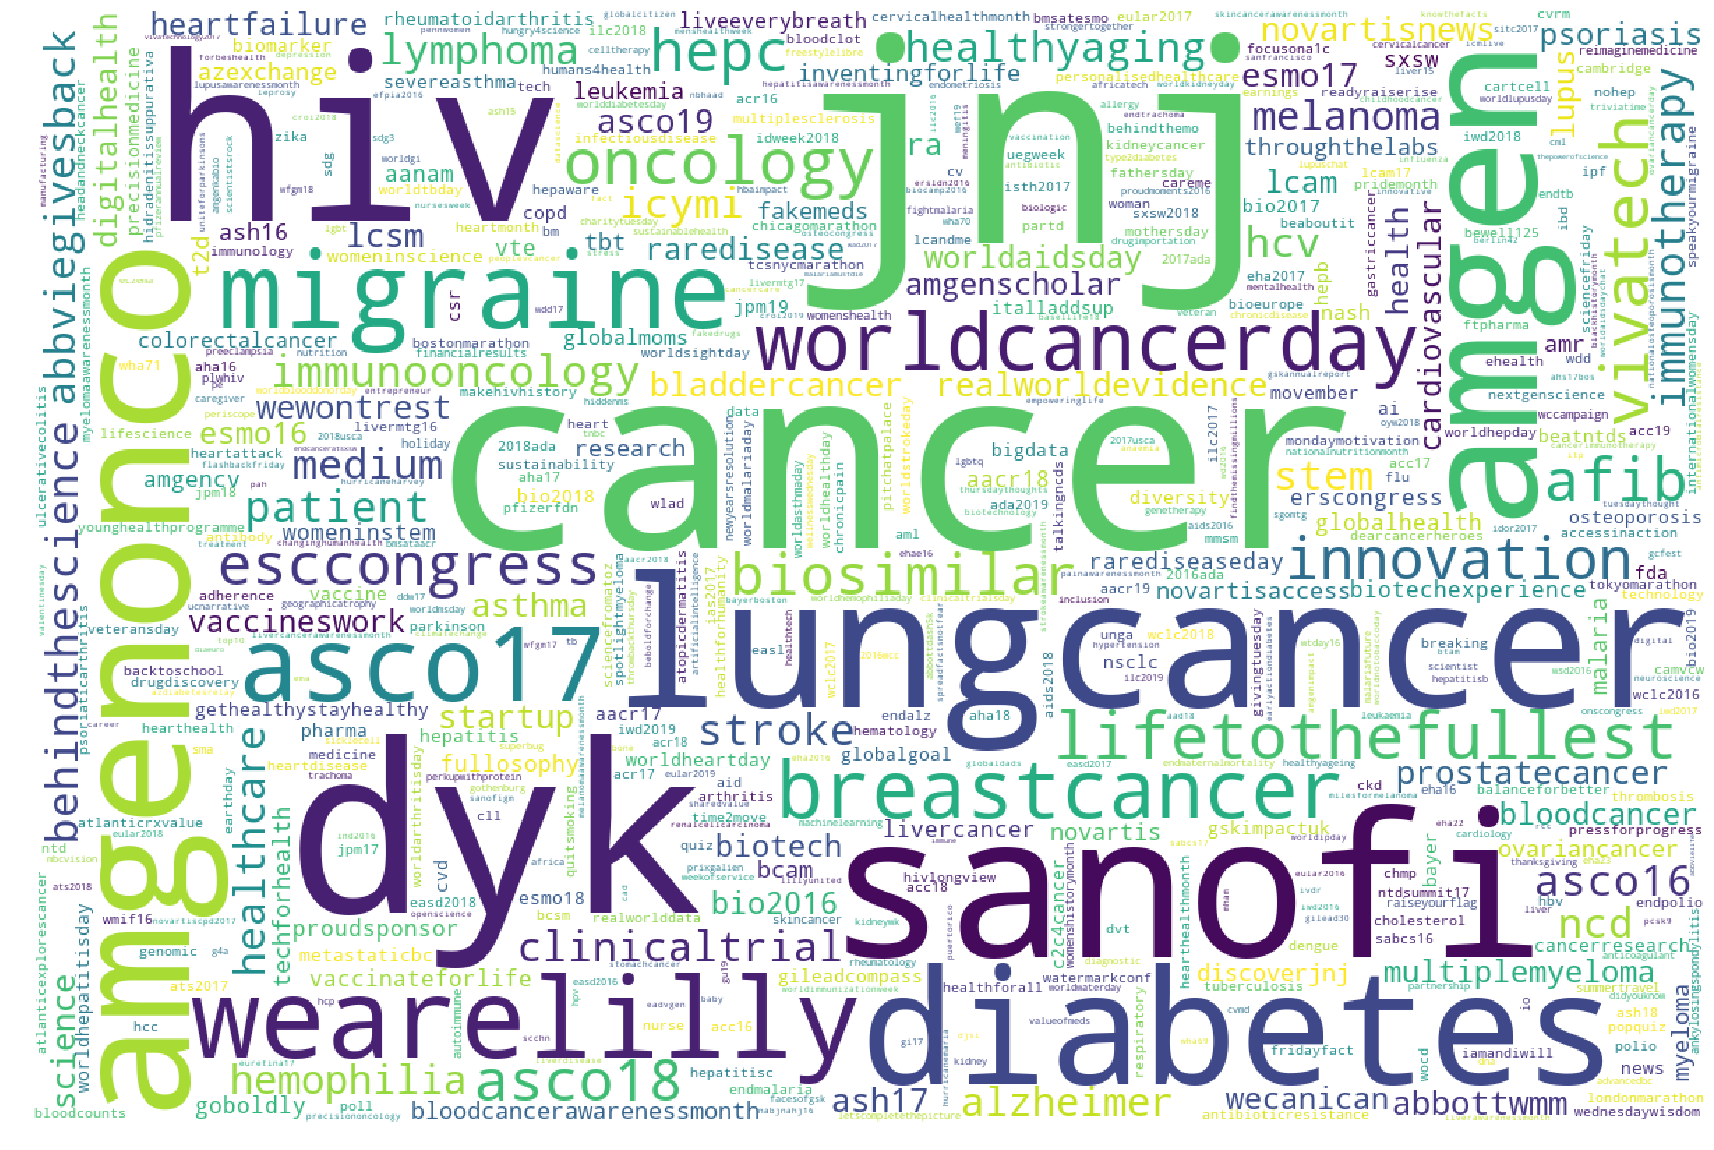

In [19]:
wordcloud_gen(get_all_words(df_all, 'hashtags'))

### Tweeting frequency and timing

- how many times they tweeter per period
- 3 most popular posts of this year, which company

- best time to tweet
"Human working memory exhibits inherent variation across time of day and is highest when we wake up in the morning, lowest in mid-afternoon, and moderate in the evening. Higher availability of working memory makes individuals alert and feel the need to seek information. This means that consumers’ desire to engage with content will likely be highest in the morning, lowest in the afternoon, and moderate in the evening."
"Assuming the majority of the audience start their day in the morning, it is ideal to post content conveying high-arousal emotion (i.e., angry or worried) in the morning and “deep think” content in the afternoon"
https://hbr.org/2018/09/a-study-shows-the-best-times-of-day-to-post-to-social-media

- długość tweeta

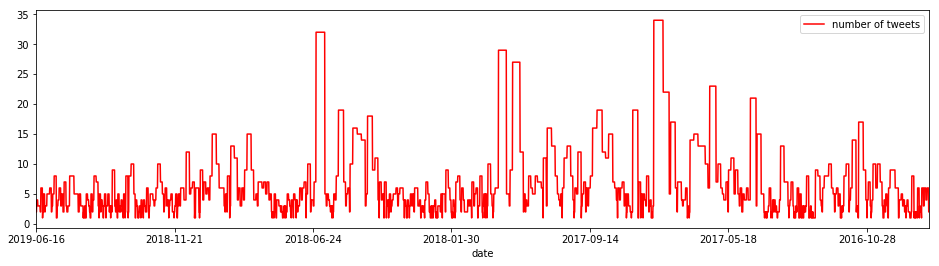

In [20]:
# How frequenlty does AstraZeneca tweet? Is it different from other companies?

time_fav = pd.Series(data=df['date'].value_counts(), index=df['date'])
time_fav.plot(figsize=(16, 4), color = 'r', label = 'number of tweets', legend = True)                

plt.show()  

In [21]:
# time_fav_all = pd.Series(data=df_all['date'].value_counts(), index=df_all['date'])
# time_fav_all.groupby('company').plot(figsize=(16, 4), color = 'r', label = 'number of tweets', legend = True)                

# plt.show() 

In [22]:



# # most liked tweets od AZ
# df.nlargest(3, 'fav')
# df_all.nlargest(15, 'fav')['clean_tweet']# overall

# d = pd.DataFrame(counter.most_common(15), columns = ['Word', 'Count'])
# d.plot.bar(x='Word',y='Count')

# number of retweets

#ax1 = sns.countplot(df['retweet'], palette='rainbow')
##ax1.set_title('%s's tweets' % company)
#ax1.set(xticklabels=['Tweets','Retweets'])

#Number of tweets hourly
#hourly_tweets = df['hour'].size().unstack()
#hourly_tweets.plot(title='Hourly Tweet Counts', colormap='coolwarm')

# hourly_tweets = df_all.groupby(['hour', 'company']).size().unstack()
# hourly_tweets.plot(title='Hourly Tweet Counts', stacked = True, colormap='coolwarm')

# #Number of tweets by the months
# monthly_tweets = df_all.groupby(['month', 'company']).size().unstack()
# monthly_tweets.plot(title='Monthly Tweet Counts', colormap='winter')

# # scatterplot of likes vs hour of posting

# ax = sns.scatterplot(x="hour", y="fav", hue="company", data=df_all, palette="Purples")


### References:
1. ["50 Companies That Get Twitter – and 50 That Don’t"](https://hbr.org/2015/04/the-best-and-worst-corporate-tweeters)
2. [List of largest pharmaceutical companies by revenue](https://en.wikipedia.org/wiki/List_of_largest_pharmaceutical_companies_by_revenue)
3. [Twitter Dev Documentation](https://developer.twitter.com/en/docs)
4. ["It’s Time to Tweet—How Pharma Should Be Using Twitter"](https://www.pm360online.com/its-time-to-tweet-how-pharma-should-be-using-twitter/)